In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
import seaborn as sns

In [5]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [6]:
df_exploded = df_DA_US.explode('job_skills')

df_grouped = df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_toppay = df_grouped.sort_values(by='median', ascending=False).iloc[1:11]   #Ignoring an outlier

df_DA_skills = df_grouped.sort_values(by= 'count', ascending=False).head(10).sort_values(by='median', ascending=False)

df_DA_toppay

,count,median
job_skills,,
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0
vmware,1,147500.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


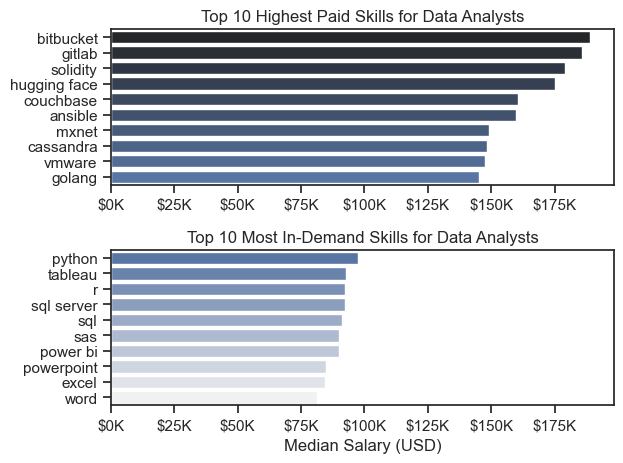

In [9]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_toppay, x='median', y=df_DA_toppay.index, ax=ax[0], palette='dark:b')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], palette='light:b_r')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

### Histogram

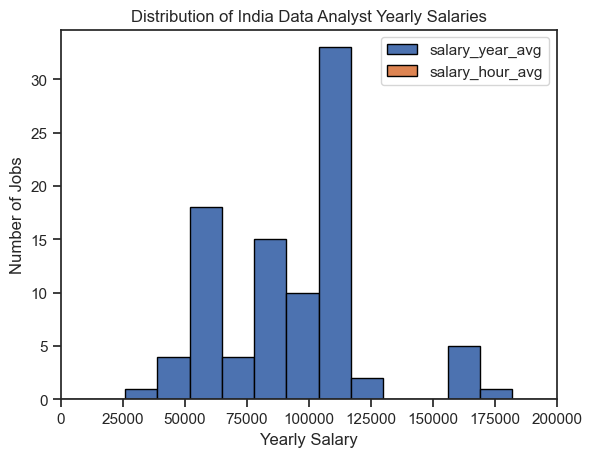

In [10]:
# Only get data analyst jobs in the India
df_DA_ind = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_ind = df_DA_ind.dropna(subset=['salary_year_avg'])

df_DA_ind.plot(kind='hist', bins = 50, edgecolor='black')
plt.xlim(0, 200000)

plt.title('Distribution of India Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


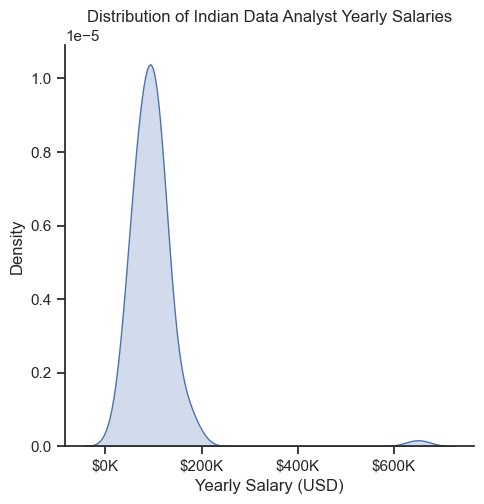

In [11]:
sns.displot(df_DA_ind['salary_year_avg'], kind='kde', fill=True, common_norm=False)

# this is all the same
plt.title('Distribution of Indian Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density') # Density is the probability of a random variable taking on a particular value
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

### Boxplot


In [14]:
job_titles=['Data Analyst', 'Data Engineer', 'Data Scientist']
# Only get data analyst jobs in the India
df_ind = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_ind = df_ind.dropna(subset=['salary_year_avg'])

job_list= [df_ind[df_ind['job_title_short'] == job_titles]['salary_year_avg'] for job_titles in job_titles]



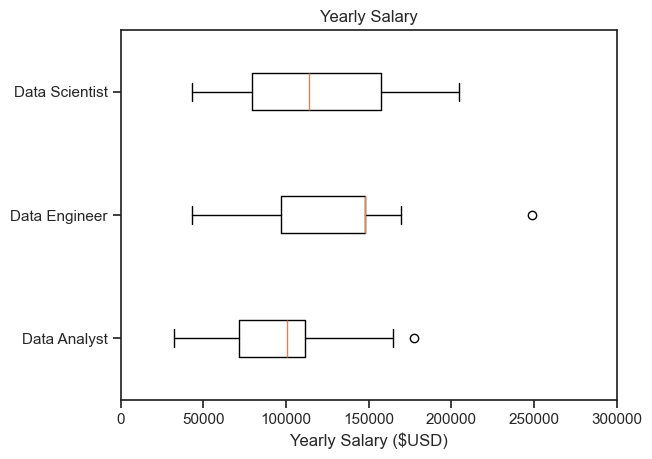

In [25]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Yearly Salary ($USD)')
plt.title('Yearly Salary')
ax = plt.gca()
plt.xlim(0,300000)
plt.show()

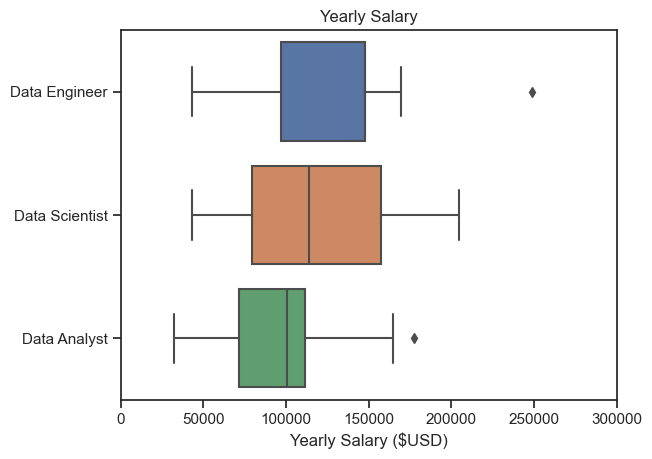

In [23]:
sns.boxplot(data=df_ind, x='salary_year_avg', y='job_title_short')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.title('Yearly Salary')
ax = plt.gca()
plt.xlim(0,300000)
plt.show()